# Automated New York Weather Forecasting & Visualization

## Project Overview
This project fetches hourly weather forecast data using the [NOAA Weather API](https://www.weather.gov/documentation/services-web-api), processes the data into a structured format using `pandas`, and visualizes key weather metrics.

The automation is scheduled to run every hour, fetching updated forecasts and generating plots which are saved locally for later review or reporting.

- Fetch Weather Data: We create  `weather_api_runner()` function to retrieves the hourly weather forecast from the NOAA API for a specific grid point (in this case, New York - `OKX/36,36`). It extracts and organizes relevant weather features such as: `temperature`, `humidity`, `probabilityOfPrecipitation`, `windSpeed`, and `shortForecast`
- Data Visualization:
Three plots are generated after each fetch:
  - **Line Plot**: Temperature, Humidity, and Precipitation over time
  - **Bar Plot**: Frequency of `shortForecast` conditions (e.g. Rain, Sunny)
  - **Line Plot**: Wind Speed over time
- Automation with Scheduler: We use the `schedule` library to automatically run the `weather_api_runner()` function every hour. It runs immediately once. Then, continues to fetch and plot data every hour on the hour.


In [42]:
# Import required libraries

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import schedule
import time

In [28]:
URL = 'https://api.weather.gov/points/40.730610,-73.935242' #New York coordinate
response = requests.get(URL)
response.json()

{'@context': ['https://geojson.org/geojson-ld/geojson-context.jsonld',
  {'@version': '1.1',
   'wx': 'https://api.weather.gov/ontology#',
   's': 'https://schema.org/',
   'geo': 'http://www.opengis.net/ont/geosparql#',
   'unit': 'http://codes.wmo.int/common/unit/',
   '@vocab': 'https://api.weather.gov/ontology#',
   'geometry': {'@id': 's:GeoCoordinates', '@type': 'geo:wktLiteral'},
   'city': 's:addressLocality',
   'state': 's:addressRegion',
   'distance': {'@id': 's:Distance', '@type': 's:QuantitativeValue'},
   'bearing': {'@type': 's:QuantitativeValue'},
   'value': {'@id': 's:value'},
   'unitCode': {'@id': 's:unitCode', '@type': '@id'},
   'forecastOffice': {'@type': '@id'},
   'forecastGridData': {'@type': '@id'},
   'publicZone': {'@type': '@id'},
   'county': {'@type': '@id'}}],
 'id': 'https://api.weather.gov/points/40.7306,-73.9352',
 'type': 'Feature',
 'geometry': {'type': 'Point', 'coordinates': [-73.9352, 40.7306]},
 'properties': {'@id': 'https://api.weather.gov/p

In [43]:
# Fetch Weather Data from NOAA API

def weather_api_runner():
    url = 'https://api.weather.gov/gridpoints/OKX/36,36/forecast/hourly'
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Request failed with status code: {response.status_code}")
        return pd.DataFrame()

    periods = response.json()['properties']['periods']

    temp_dict = []
    for period in periods:
        data = {
            "startTime": period.get("startTime"),
            "temperature": period.get("temperature"),
            "precipitation": period.get("probabilityOfPrecipitation", {}).get("value"),
            "humidity": period.get("relativeHumidity", {}).get("value"),
            "windSpeed": period.get("windSpeed"),
            "shortForecast": period.get("shortForecast")
        }
        temp_dict.append(data)

    df = pd.DataFrame(temp_dict)
    df['startTime'] = pd.to_datetime(df['startTime'])

    print(f"Data fetched at {datetime.now()}")

    # Plot 1: Temp, humidity, precipitation
    plt.figure(figsize=(14, 6))
    plt.plot(df['startTime'], df['temperature'], label='Temperature (°F)', color='tomato')
    plt.plot(df['startTime'], df['humidity'], label='Humidity (%)', color='skyblue')
    plt.plot(df['startTime'], df['precipitation'], label='Precipitation (%)', color='slategray')
    plt.title('Hourly Weather Forecast')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"plot_temperature_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png")
    plt.show()
    plt.close()

    # Plot 2: Bar of forecast types
    df['shortForecast'].value_counts().plot(kind='bar', figsize=(10, 5), color='teal')
    plt.title('Frequency of Short Forecasts')
    plt.xlabel('Forecast Type')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.savefig(f"plot_forecast_freq_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png")
    plt.show()
    plt.close()

    # Plot 3: Wind speed
    df['windSpeed_num'] = df['windSpeed'].str.extract(r'(\d+)').astype(float)
    plt.figure(figsize=(12, 5))
    plt.plot(df['startTime'], df['windSpeed_num'], label='Wind Speed (mph)', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Wind Speed (mph)')
    plt.title('Wind Speed Forecast')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"plot_windspeed_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png")
    plt.show()
    plt.close()

    return df

Data fetched at 2025-05-14 16:47:22.510018


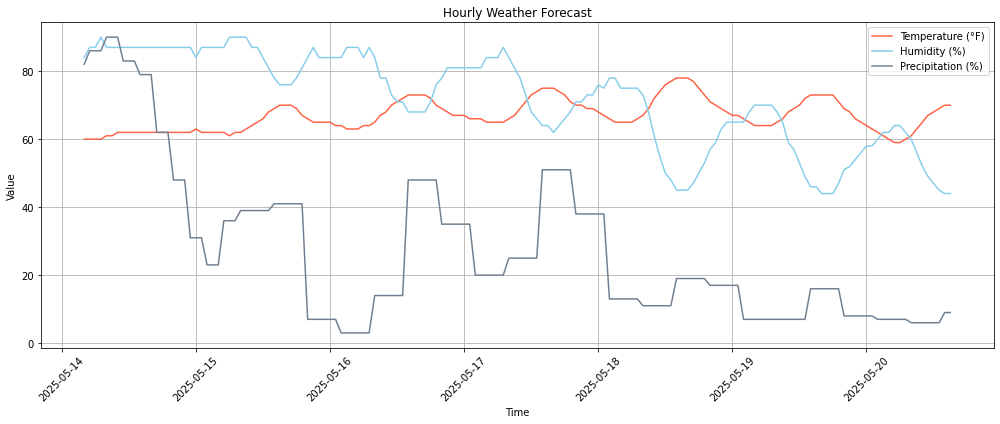

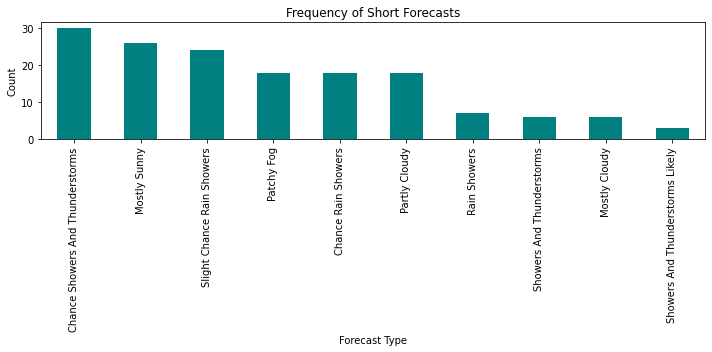

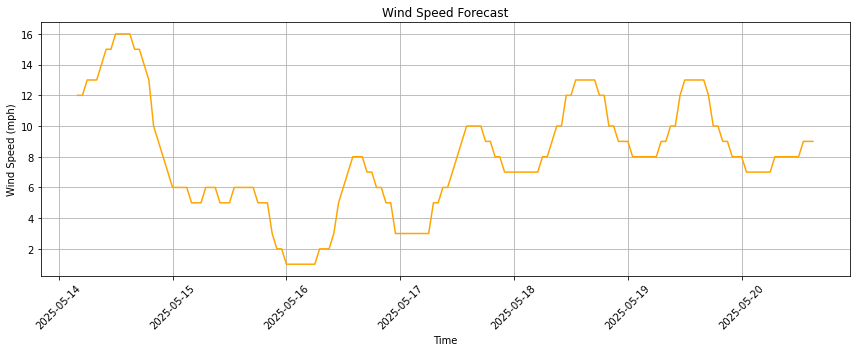

Scheduler started. Running `weather_api_runner()` every hour...


KeyboardInterrupt: 

In [44]:
# Run once immediately
weather_api_runner()

# Schedule every hour
schedule.every().hour.do(weather_api_runner)

print("Scheduler started. Running `weather_api_runner()` every hour...")

while True:
    schedule.run_pending()
    time.sleep(60)

In [45]:
df

,startTime,temperature,precipitation,humidity,windSpeed,shortForecast,windSpeed_num
0,2025-05-14 04:00:00-04:00,60,82,84,12 mph,Rain Showers,12.0
1,2025-05-14 05:00:00-04:00,60,86,87,12 mph,Rain Showers,12.0
2,2025-05-14 06:00:00-04:00,60,86,87,13 mph,Rain Showers,13.0
3,2025-05-14 07:00:00-04:00,60,86,90,13 mph,Rain Showers,13.0
4,2025-05-14 08:00:00-04:00,61,90,87,13 mph,Rain Showers,13.0
...,...,...,...,...,...,...,...
151,2025-05-20 11:00:00-04:00,67,6,49,8 mph,Mostly Sunny,8.0
152,2025-05-20 12:00:00-04:00,68,6,47,8 mph,Mostly Sunny,8.0
153,2025-05-20 13:00:00-04:00,69,6,45,9 mph,Mostly Sunny,9.0
154,2025-05-20 14:00:00-04:00,70,9,44,9 mph,Mostly Sunny,9.0


## Conclusion
This project demonstrates how to:
- Use public APIs for live weather data
- Automate data fetching and visualization
- Save results for reporting or future analysis